<a href="https://colab.research.google.com/github/AIexndr/N_N/blob/main/GB_NEYRONKI_DZ1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Пример построения  двухслойной нейронной сети на numpy**

In [1]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [2]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return (x)*(1 - (x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


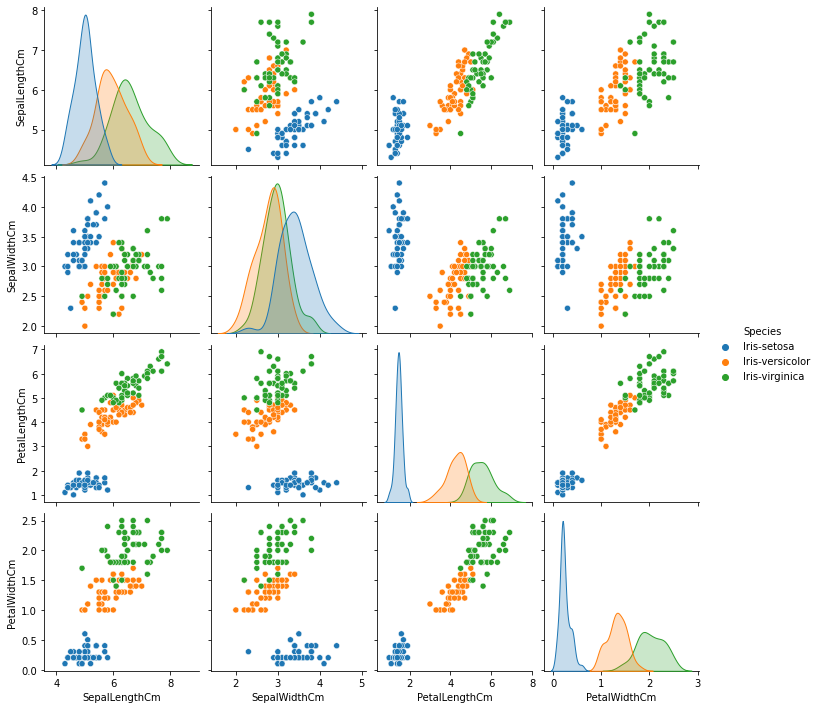

In [4]:

### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
#iris_data = pd.read_csv("Iris.csv")
iris_data = pd.read_csv("../content/Iris.csv")
#iris_data = pd.read_csv("Iris.csv")
#iris_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
#x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
#y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [ ]:
y

In [11]:
# создаем таблицу для записи данных
frame = pd.DataFrame(columns=['Число нейронов', 'Скорость', 'Число эпох', 'Точность'])
frame

,Число нейронов,Скорость,Число эпох,Точность


Далее - ставим эксперименты - сначала меняя все параметры, затем, определяя примерное расположение минимума ошибки - смотрим как влияют параметры на её оптимизацию

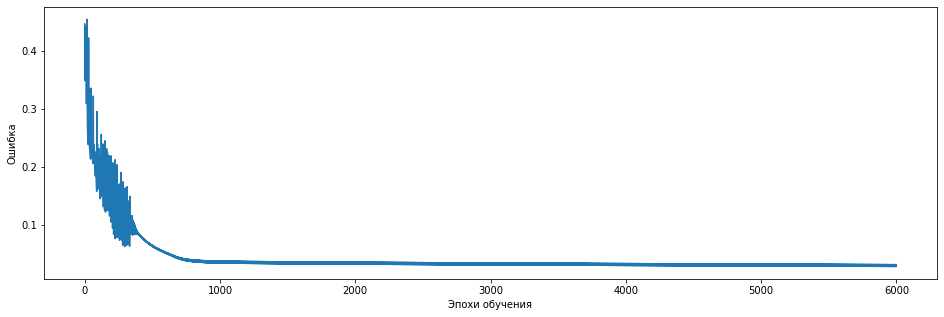

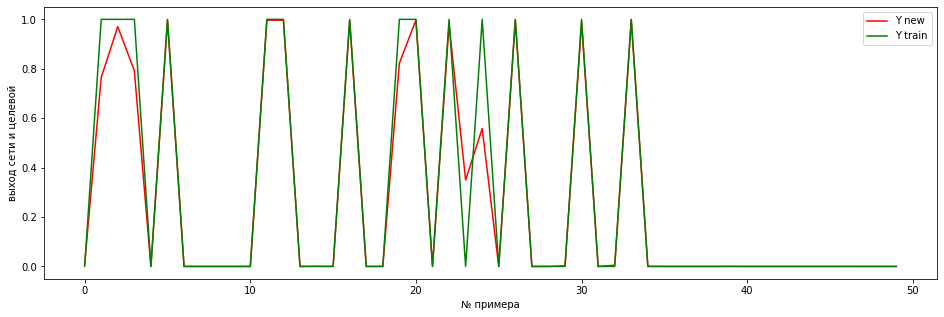

Точность нейронной сети 96.88%


In [124]:
### Шаг 3. Обученние нейронной сети

# создаем таблицу для записи данных


# определим число нейронов скрытого слоя
neuron_numb = 6


# присвоить случайные веса
w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода



# скорость обучения (learning rate)
n = 0.7

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
nepoh = 6000
for i in range(nepoh):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)  # шаг обратного распостранения для первого слоя
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    # это шаг коррекции
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n  # производная от потерь - а n это скорость обучения
    # метрика модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# график диаграммы точность в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Эпохи обучения')
plt.ylabel('Ошибка')
plt.show() # убрать знак коммент., чтобы посмотреть 

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # убрать ком., чтобы посмотреть 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")




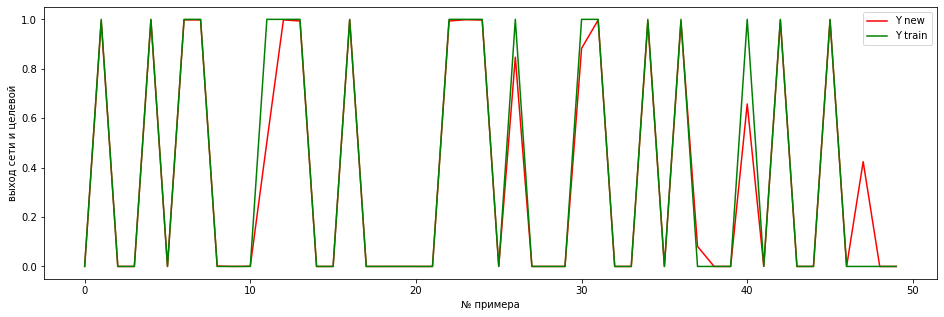

Точность нейронной сети на тесте 97.58%


In [125]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t
    
    
N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # убрать ком., чтобы посмотреть

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Точность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

In [126]:
 frame = frame.append({                  
         'Число нейронов' : neuron_numb,
         'Скорость' : n,
         'Число эпох' : nepoh,
         'Точность' : accuracy_t,
   }, ignore_index=True)

In [127]:
 frame

,Число нейронов,Скорость,Число эпох,Точность
0,1.0,0.10,3000.0,63.472778
1,5.0,0.10,3000.0,96.270763
2,10.0,0.10,3000.0,96.340304
3,1.0,0.50,3000.0,65.323437
4,5.0,0.50,3000.0,97.319650
5,10.0,0.50,3000.0,96.169670
6,5.0,1.00,3000.0,96.266648
7,5.0,0.70,3000.0,97.376933
8,5.0,0.70,5000.0,97.568275
9,5.0,0.70,8000.0,97.532398


# ВЫВОДЫ - 
На основании 28 проведённых экспериментов с изменением 3-х основных параметров (Число нейронов	Скорость	Число эпох) можно сделать следующие выводы
  - 	Локальные максимумы точности находятся в диапазоне 97.4-97.6      ( тут получилось достигнуть 97.63 )   Так как было отмечено, что нас в большей степени будут интересовать погрешность на тестовых данных, то внимание было уделено ошибке на тестах.
     Эти максимумы достигаются при скорости 0.7 , числе нейронов в  слое 5-6-7 -  и числе эпох 4000 - 6000 . Отклонение этих параметров в сторону уменьшения - увеличения приводят к более слабому результату.

## Домашнее задание

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев).
2. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?